## EDA: Movielens Dataset

First of all we import the needed libraries.

In [2]:
# import the needed libraries for the EDA
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


We read the cleaned file for the Movielens

In [3]:
# we read the Movielens cleaned data
# we set the directory to the cleaned folder
os.listdir(os.path.join('.', 'cleaned'))

['movielens_parquet', 'netflix_parquet']

After importing the needed libraries, we will start looking at the content of the Movielens

In [4]:
ML = pd.read_parquet('cleaned/movielens_parquet')

First of all we look into the shape and size of the data, to see how many different movies we have.

In [5]:
# we check the columns of the dataframe
print(ML.columns)

Index(['movieId', 'title', 'genres', 'year', 'review_data', 'imdbId',
       'tmdbId'],
      dtype='object')


In [6]:
# We print the shape of the dataframe and the number of unique movies
print(ML.shape)
print(ML['movieId'].nunique())

(9742, 7)
9742


In [7]:
# We describe the dataframe
ML.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


We have to check if there are NaN values

In [8]:
# We check if there are NaN values in the dataframe where we print the percentages of NaN values
def check_nan(df):
    nan_values = df.isna().sum()
    nan_values = nan_values[nan_values > 0]
    nan_values = nan_values / len(df)
    print(nan_values)

check_nan(ML)

year      0.001334
tmdbId    0.000821
dtype: float64


In [9]:
# We print the content of the dataframe
ML.head()

,movieId,title,genres,year,review_data,imdbId,tmdbId
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,"[{'date': 2000-07-30, 'rating': 4.0, 'tag': No...",114709,862.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,"[{'date': 1996-10-17, 'rating': 4.0, 'tag': No...",113497,8844.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,"[{'date': 2000-07-30, 'rating': 4.0, 'tag': No...",113228,15602.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,"[{'date': 1996-10-17, 'rating': 3.0, 'tag': No...",114885,31357.0
4,5,Father of the Bride Part II,[Comedy],1995,"[{'date': 1996-10-17, 'rating': 5.0, 'tag': No...",113041,11862.0


In [10]:
# We print the type of the columns
print(ML.dtypes)

movieId          int64
title           object
genres          object
year            object
review_data     object
imdbId           int64
tmdbId         float64
dtype: object


In [11]:
# Explode the lists in the 'genres' column into separate rows
exploded_genres = ML.explode('genres')['genres']

# Get unique genres
unique_genres = exploded_genres.unique()

# Print unique genres
print(unique_genres)


['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'War' 'Musical'
 'Documentary' 'IMAX' 'Western' 'Film-Noir' '(no genres listed)']


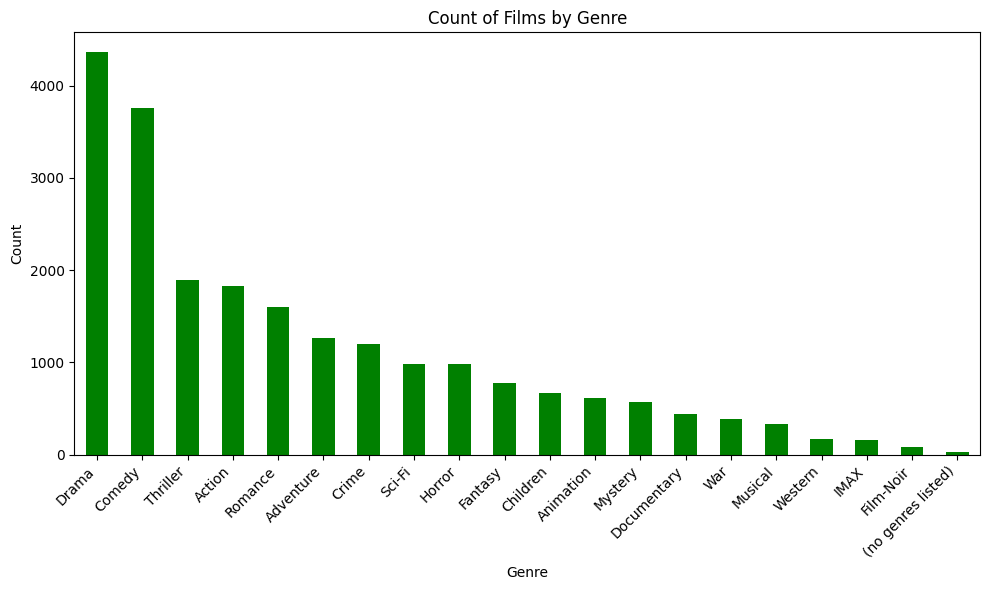

In [12]:
# Create a list to hold all genres
all_genres = []

# Iterate through each row of the DataFrame and append each genre to the list
for genres_list in ML['genres']:
    all_genres.extend(genres_list)

# Create a pandas Series from the list of all genres and count occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plotting the count of each genre
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='green')
plt.title('Count of Films by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


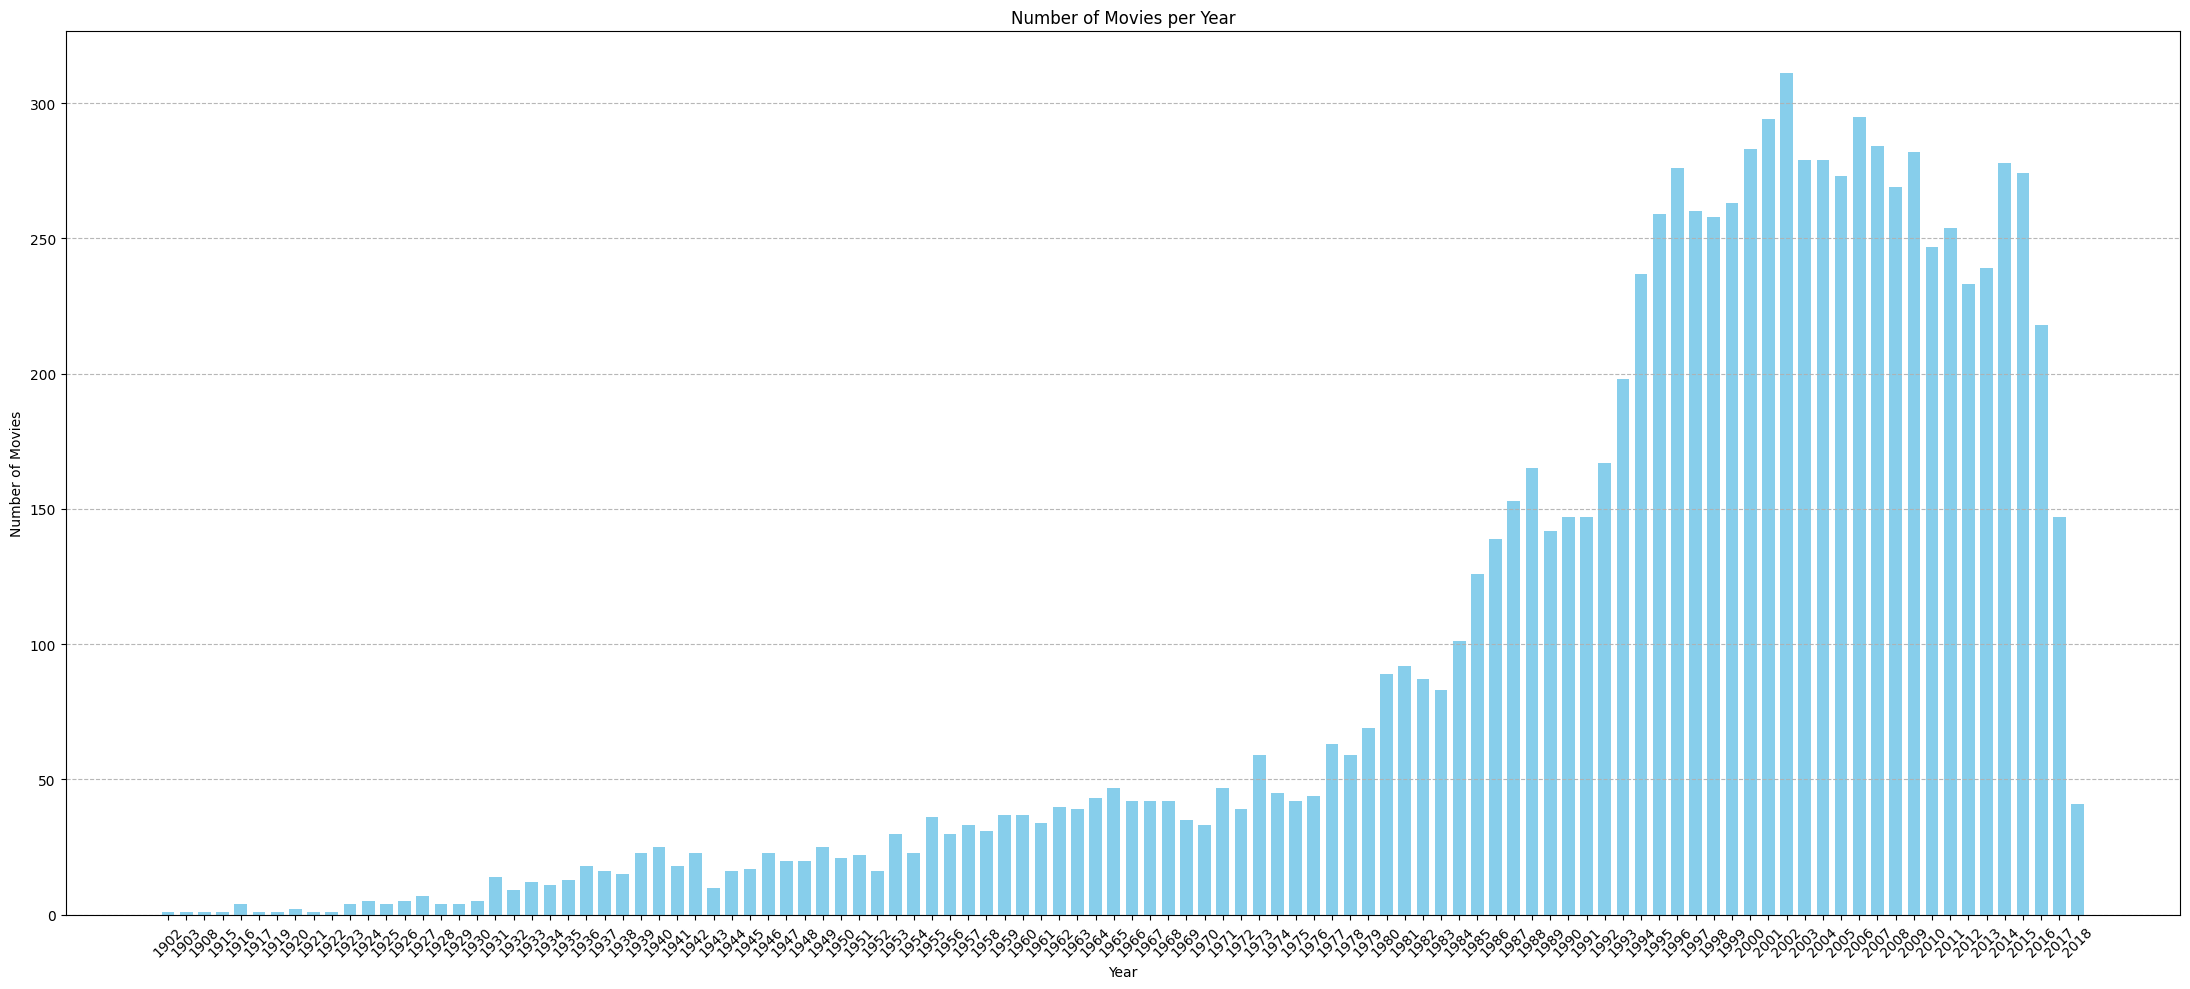

In [13]:
# Counting the number of movies per year
movies_per_year = ML['year'].value_counts().sort_index()

# Plotting the count of movies per year with increased separation
plt.figure(figsize=(22, 10))
bar_width = 0.7  # Adjust the width of each bar
plt.bar(movies_per_year.index, movies_per_year.values, color='skyblue', width=bar_width, align='center')

plt.title('Number of Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

# Adjust x-ticks positions for better readability
plt.xticks(movies_per_year.index, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()


In [14]:
# We will also plot the 

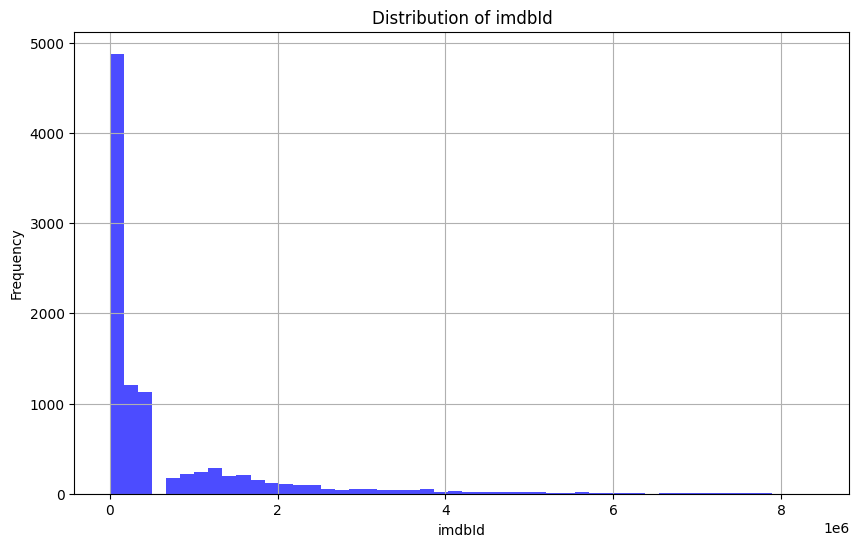

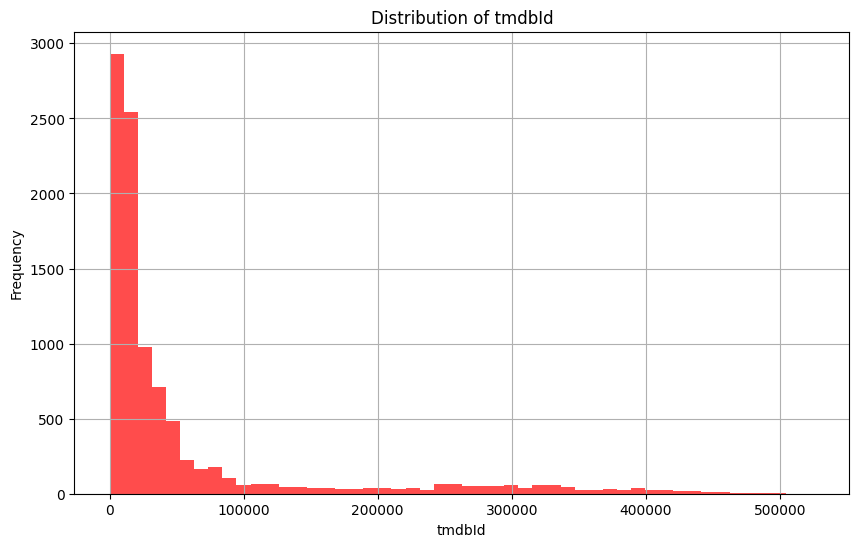

In [15]:
import matplotlib.pyplot as plt

# Plotting the distribution of imdbId
plt.figure(figsize=(10, 6))
plt.hist(ML['imdbId'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of imdbId')
plt.xlabel('imdbId')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the distribution of tmdbId
plt.figure(figsize=(10, 6))
plt.hist(ML['tmdbId'], bins=50, color='red', alpha=0.7)
plt.title('Distribution of tmdbId')
plt.xlabel('tmdbId')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The plots show the right skewed distributions of both the columns

We also have to look into the `review_data`, each movie that is in the dataframe has all the reviews that have been done about them in the column `review_data`.

In [16]:
# Calculate the total number of reviews
total_reviews = sum(len(review_list) for review_list in ML['review_data'])

# Calculate the average number of reviews per movie
avg_reviews = total_reviews / ML['movieId'].nunique()

print("The average number of reviews per movie is: " , avg_reviews)
print("The total number of reviews is: ", total_reviews)
print("The number of unique movies is: ", ML['movieId'].nunique())


The average number of reviews per movie is:  10.560870457811538
The total number of reviews is:  102884
The number of unique movies is:  9742


Looking at the numbers above we see that it is going to be difficult to plot data about the reviews since we have `9742` different movies and an average of more than `10` reviews per movie.

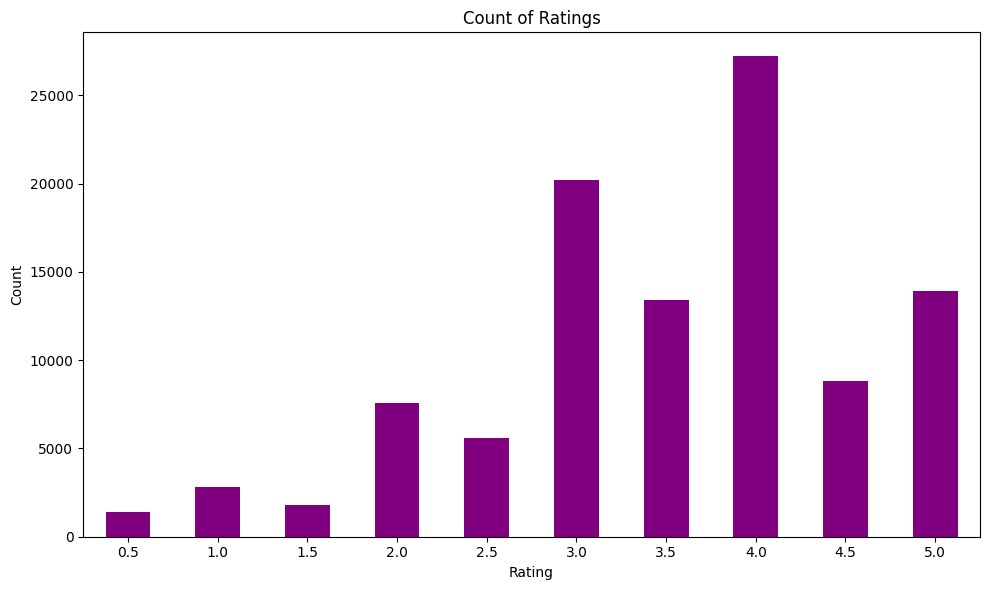

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a list to hold all ratings
all_ratings = []

# Iterate through each row of the DataFrame and append each rating to the list
for reviews_list in ML['review_data']:
    for review in reviews_list:
        all_ratings.append(review['rating'])
        
# Create a pandas Series from the list of all ratings and count occurrences of each rating
rating_counts = pd.Series(all_ratings).value_counts().sort_index()

# Plotting the count of each rating
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='purple')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<Figure size 1700x600 with 0 Axes>

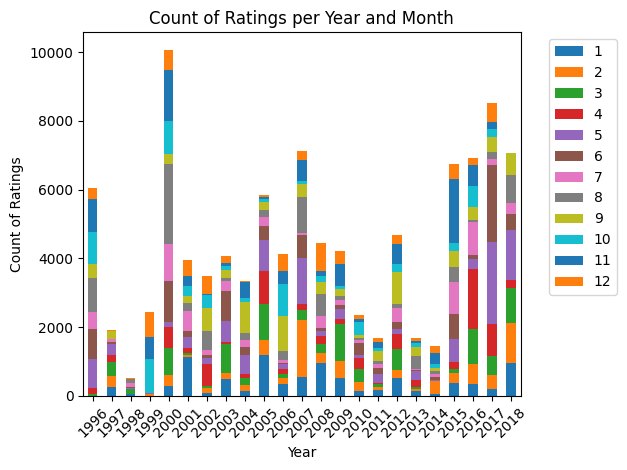

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Create lists to hold all years and months
all_years = []
all_months = []

# Iterate through each row of the DataFrame and extract year and month from the 'date' key of each dictionary
for reviews_list in ML['review_data']:
    for review in reviews_list:
        if review['date'] is not None:  # Check if 'date' is not None
            year_month = review['date'].strftime('%Y-%m')
            year, month = year_month.split('-')
            all_years.append(int(year))
            all_months.append(int(month))

# Create a pandas DataFrame from the lists of years and months
ratings_per_year_month = pd.DataFrame({'Year': all_years, 'Month': all_months})

# Plotting the count of ratings per year and month
plt.figure(figsize=(17, 6))
ratings_per_year_month.groupby(['Year', 'Month']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Count of Ratings per Year and Month')
plt.xlabel('Year')
plt.ylabel('Count of Ratings')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjusting legend position
plt.tight_layout()
plt.show()


## Feature Engeneering